# MNIST digits classification

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the MNIST homepage.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
(xtrain,ytrain),(xtest,ytest) = tf.keras.datasets.mnist.load_data()
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [3]:
ytrain = tf.keras.utils.to_categorical(ytrain,num_classes=10)
ytest = tf.keras.utils.to_categorical(ytest,num_classes=10)

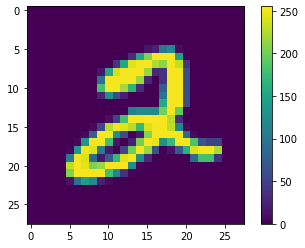

In [4]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[5])
plt.colorbar()
plt.show()

In [5]:
# xtrain  = xtrain/255
# xtest  = xtest/255

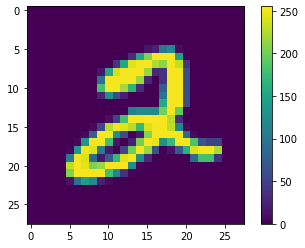

In [6]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[5])
plt.colorbar()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


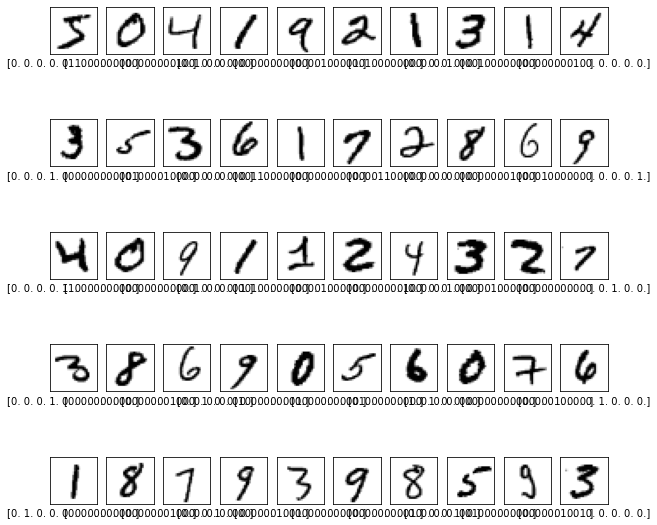

In [7]:
class_names = ['zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

# multiple plots
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(xtrain[i],cmap='binary')
#     no xline notation
    plt.xticks([])
#     no yline notation
    plt.yticks([])
    plt.xlabel(ytrain[i])
    
plt.show()

## DNN model

In [8]:
model = tf.keras.models.Sequential()

# 2D -> 1D
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
# Normalize the dataset

model.add(tf.keras.layers.BatchNormalization())

# add hidden layer1
model.add(tf.keras.layers.Dense(units=120, activation= 'relu'))

# add L2 layer
model.add(tf.keras.layers.Dense(units=75,activation='relu'))

# add L3 layer
model.add(tf.keras.layers.Dense(units=45,activation='relu'))
# add output layer
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))


In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(xtrain,ytrain,batch_size=30,epochs=30,validation_data=(xtest,ytest))


Epoch 1/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2371 - accuracy: 0.9267 - val_loss: 0.3282 - val_accuracy: 0.9588
Epoch 2/30
2000/2000 [==============================] - 7s 3ms/step - loss: 0.1178 - accuracy: 0.9629 - val_loss: 0.2377 - val_accuracy: 0.9636
Epoch 3/30
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0891 - accuracy: 0.9727 - val_loss: 0.2400 - val_accuracy: 0.9697
Epoch 4/30
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0746 - accuracy: 0.9760 - val_loss: 0.3236 - val_accuracy: 0.9655
Epoch 5/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0637 - accuracy: 0.9795 - val_loss: 0.3782 - val_accuracy: 0.9685
Epoch 6/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0567 - accuracy: 0.9821 - val_loss: 0.3390 - val_accuracy: 0.9681
Epoch 7/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0519 - accuracy: 0.9839 - val_loss: 0.2556 - val_accuracy: